# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here

#### Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

#### Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Dictionary

The data includes various information related to a food order. A detailed data dictionary is provided below:

*  order_id: A unique identifier for each food order.

*  customer_id: A unique identifier for the customer who placed the order.

*  restaurant_name: The name of the restaurant from which the food was ordered.

*  cuisine_type: The type of cuisine ordered by the customer (e.g., Italian, Mexican, etc.).

*  cost_of_the_order: The total cost of the food order.

*  day_of_the_week: Indicates whether the order was placed on a weekday (Monday to Friday) or a weekend (Saturday and Sunday).

*  rating: The rating given by the customer on a scale of 1 to 5.

*  food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated as the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

*  delivery_time: Time (in minutes) taken by the delivery person to deliver the food. This is calculated as the difference between the timestamps of the delivery person's pick-up confirmation and the drop-off information.

### Let us start by importing the required libraries

In [1]:
# Write your code here to import necessary libraries for the project

# Importing libraries for Data Manipulation
import numpy as np
import pandas as pd

# Importing libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Write your code here to read the data
foodhub_df = pd.read_csv("foodhub_order.csv")

In [4]:
# Write your code here to view the first 5 rows
foodhub_df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
print(f"There are {foodhub_df.shape[0]} rows and {foodhub_df.shape[1]} columns in the dataset.")

There are 1898 rows and 9 columns in the dataset.


#### Observations:
* There are 1898 rows and 9 columns in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


| #  | Column                | Non-Null Count | Datatype   |
|----|-----------------------|---------------|-------- |
| 0  | order_id              | 1898 non-null  | int64   |
| 1  | customer_id           | 1898 non-null  | int64   |
| 2  | restaurant_name       | 1898 non-null  | object  |
| 3  | cuisine_type          | 1898 non-null  | object  |
| 4  | cost_of_the_order     | 1898 non-null  | float64 |
| 5  | day_of_the_week       | 1898 non-null  | object  |
| 6  | rating                | 1162 non-null  | object  |
| 7  | food_preparation_time | 1898 non-null  | int64   |
| 8  | delivery_time         | 1898 non-null  | int64   |


The 9 columns are divided into 3 different data types:

* object: restaurant_name, cuisine_type, day_of_the_week, rating
* int64: order_id, customer_id, food_preparation_time, delivery_time
* float64: cost_of_the_order

The dataframe has one float, four integer, and four object data types. The Rating column has an incorrect data type. Additionally, Order ID and Customer ID are categorical variables represented with numerical labels, which may require adjustment.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here

# Preliminary assessment to check for null values
foodhub_df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [8]:
# checking for non null missing values
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


There are no null values in the dataset. However, the column "rating" has a string datatype which should have been numeric datatype. Let's evaluate further the "rating" column for better understanding.

In [9]:
# The rating column has incorrect data type. Hence, checking the unique values
foodhub_df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [10]:
foodhub_df['rating_original'] = foodhub_df['rating']
# Changing the "Not given" values to 0 for further analysis of the variable
foodhub_df['rating'] = foodhub_df['rating'].replace(['Not given'],0)

# Changing the rating column to correct data type
foodhub_df['rating'] = foodhub_df['rating'].astype(float)

#Validating the data type
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_original        1898 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


#### Observations:

There are no null values present in the dataset, so no missing value treatment is necessary. However, it's important to note that some orders did not receive customer reviews; in such cases, the value 'Not given' was replaced with 0 to ensure consistency.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Write your code here
foodhub_df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,2.659642,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,2.195280,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,0.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,0.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:

* Minimum time for food preparation:  20
* Maximum time for food preparation:  35
* Average time for food preparation:  27.37

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Write the code here
foodhub_df['rating'].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations:

After replacing the 'Not Given' values in the rating column with zero, we found that there are **736 unrated orders**, as indicated by the count of zero ratings.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

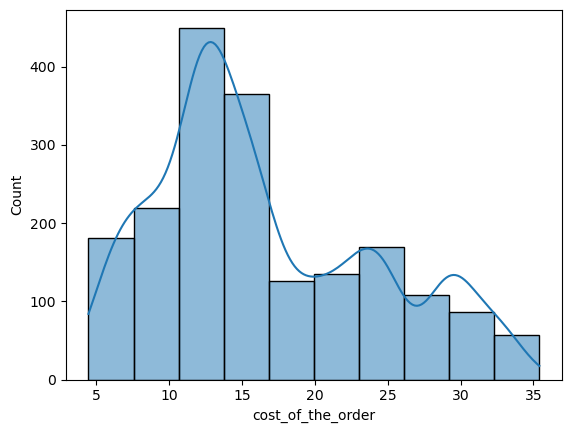

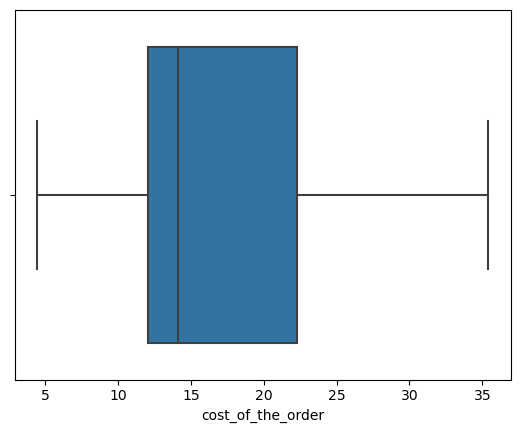

In [13]:
# Write the code here

sns.histplot(data = foodhub_df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data = foodhub_df, x='cost_of_the_order')
plt.show();

#### Observations on cost_of_the_order:

* The histogram is skewed to the right, indicating that most orders are concentrated at lower price points, though there's a noticeable secondary peak around \$25.

* The boxplot shows a median order cost of approximately \$14, with a right-skewed distribution, suggesting a wider range of higher-value orders. 

* Considering our primary customer segments—students and working professionals—this pattern may reflect their behavior, where students tend to place lower-cost orders, forming the main and left peaks, while professionals likely contribute to the higher-cost secondary peak.


##### Right-Skewed Distribution:

* The histogram (with KDE) shows that the distribution of order costs is right-skewed, meaning most orders are on the lower-cost end, with fewer high-cost orders.

##### Frequent Cost Range:

* The most frequent order costs appear to lie between 10 and 15, with a noticeable peak around 12 to 13. This suggests that most customers prefer or tend to spend in this affordable range.

##### Secondary Peak:

* There’s a slight bump around \$25, indicating a secondary cluster of orders, possibly from a different customer segment like professionals or larger group orders.

##### Median and Spread:

* The boxplot confirms that the median cost is around 14, and the interquartile range (IQR) spans approximately from 11 to 22.

* This indicates that 50\% of orders fall within this cost range.

##### Outliers:

* The boxplot also shows a few higher-end outliers (above \$30), which are rare but exist in the dataset. These could be premium restaurant orders or bulk orders.

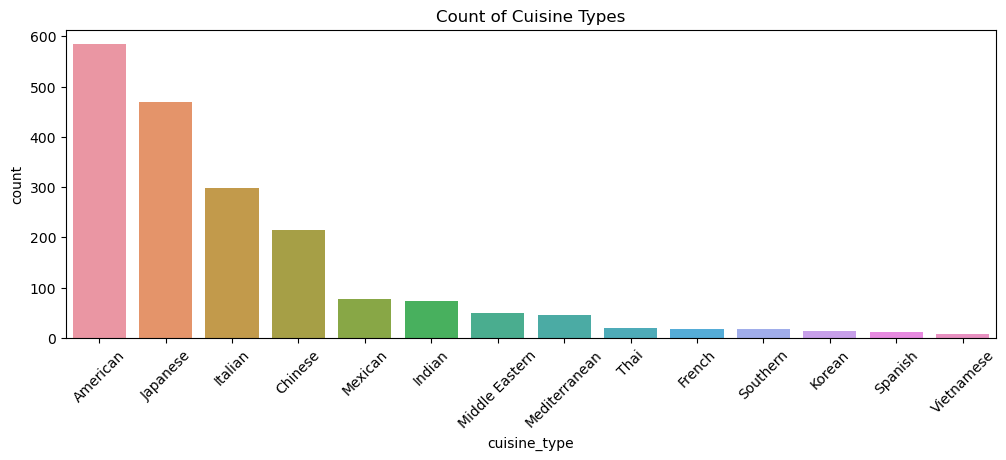

In [14]:
plt.figure(figsize=(12, 4))
sns.countplot(x="cuisine_type", data=foodhub_df, order=foodhub_df["cuisine_type"].value_counts().index)
plt.title("Count of Cuisine Types")
plt.xticks(rotation=45)
plt.show()

#### Observations on cost_of_the_order:

* American cuisine is the most ordered, with close to 600 orders, indicating its high popularity among customers.

* Japanese and Italian cuisines follow, with over 450 and 300 orders respectively, showing they are also in strong demand.

* Chinese cuisine has a moderate order count, suggesting a decent but not dominant preference.

* Cuisines like Mexican, Indian, Middle Eastern, and Mediterranean have significantly fewer orders (less than 100), indicating they are less popular or less available.

* French, Southern, Korean, Spanish, and Vietnamese cuisines have minimal representation, possibly due to limited availability, lower demand, or niche customer interest.

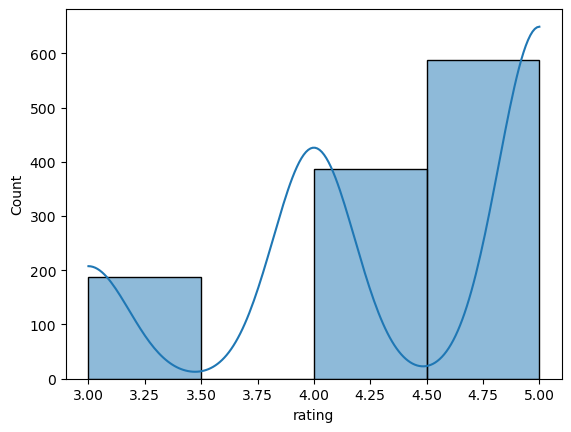

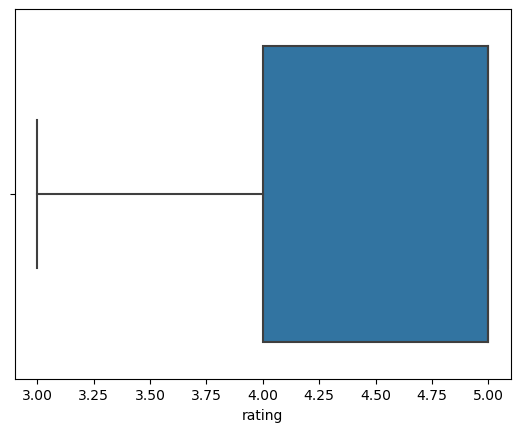

In [15]:
df0 = foodhub_df[foodhub_df['rating']!= 0]

sns.histplot(data = df0, x='rating',bins = 4,stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df0, x='rating')
plt.show();

#### Observations on Rating

* Most ratings lie between 4.0 and 5.0, indicating high overall customer satisfaction.

* The distribution is slightly right-skewed, with more frequent higher ratings.

* The KDE line shows two noticeable peaks—one near 4.2 and another close to 5.0, suggesting common high scores.

* The boxplot shows a high median (~4.5) and a tight interquartile range, pointing to consistent quality in service.

* No significant outliers are visible in the boxplot, indicating few extreme dissatisfaction cases.

* A smaller number of ratings are closer to 3.0, which may indicate occasional poor experiences worth investigating.

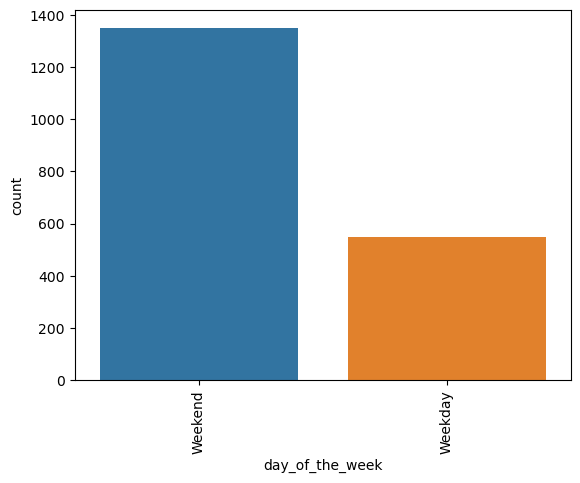

In [16]:
sns.countplot(data=foodhub_df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations on day_of_the_week:


* Weekends have significantly more orders compared to weekdays.

* This suggests a higher customer demand on weekends, likely due to increased free time and social gatherings.

* Weekday order volume is relatively low, which may reflect busy schedules or fewer meal purchases during workdays.

* This trend could be useful for staffing, promotional planning, and resource allocation, especially focusing more on weekends.

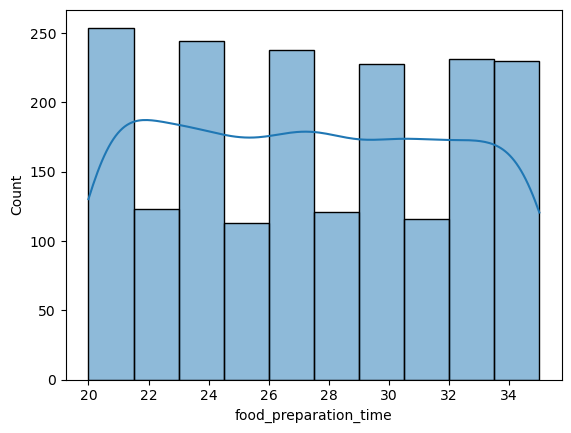

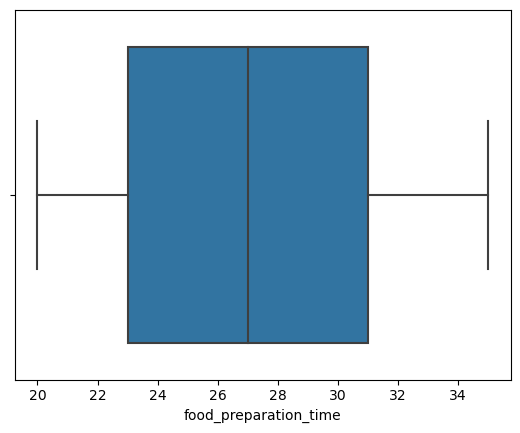

In [17]:
sns.histplot(data = foodhub_df, x='food_preparation_time',bins = 10, stat = 'count',kde = True)
plt.show()
sns.boxplot(data = foodhub_df, x='food_preparation_time')
plt.show();

#### Observations on food_preparation_time:

* Food preparation times are evenly distributed between 20 and 35 minutes, showing no extreme skewness in the data.

* The histogram with KDE indicates a relatively flat distribution, suggesting consistency in kitchen operations.

* The boxplot confirms a median prep time of around 27 minutes, with the interquartile range (IQR) spanning from approximately 23 to 32 minutes.

* No significant outliers are visible, indicating stable and controlled food preparation times across orders.

* Overall, the preparation process appears to be efficient and consistent, with most meals being prepared within a predictable time window.

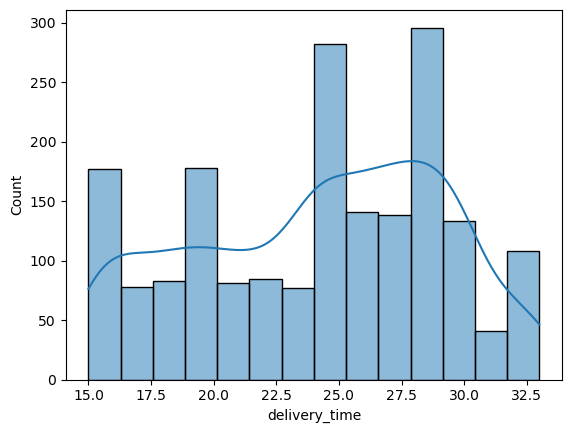

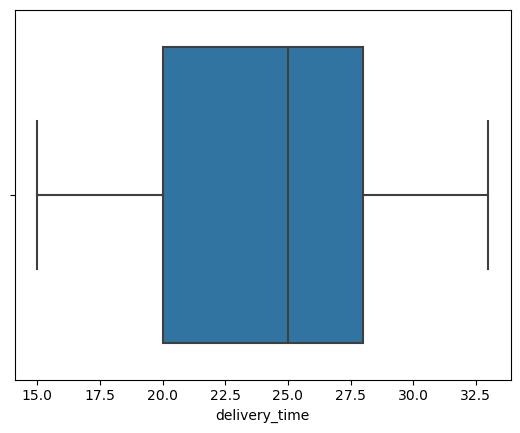

In [18]:
# Write the code here
sns.histplot(data = foodhub_df, x='delivery_time', stat = 'count',kde = True,)
plt.show()
sns.boxplot(data = foodhub_df, x='delivery_time')
plt.show();

#### Observations on delivery_time:

* Delivery times range between 15 to 33 minutes, indicating moderate variability in the time taken to deliver food orders.

* The histogram shows a fairly uniform distribution, with mild peaks around 25 and 28 minutes, suggesting slightly higher delivery volume during those time slots.

* The KDE curve is not strongly skewed, indicating a near-normal distribution of delivery times.

* The boxplot confirms the median delivery time is around 25 minutes, with the interquartile range (IQR) approximately between 20 to 30 minutes.

* No extreme outliers are present in the boxplot, which implies consistency in delivery performance.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Write the code here
order_counts = foodhub_df.groupby(['restaurant_name'], as_index=False)['order_id'].count()\
.sort_values(by=['order_id'], ascending=False).rename(columns = {'order_id':'order_count'})\
.reset_index(drop= True)

order_counts.head()

,restaurant_name,order_count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:

* Shake Shack leads with 219 orders, followed by The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (68). Together, these five restaurants account for the highest number of processed orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_original
cuisine_type,,,,,,,,,
American,415,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53,53


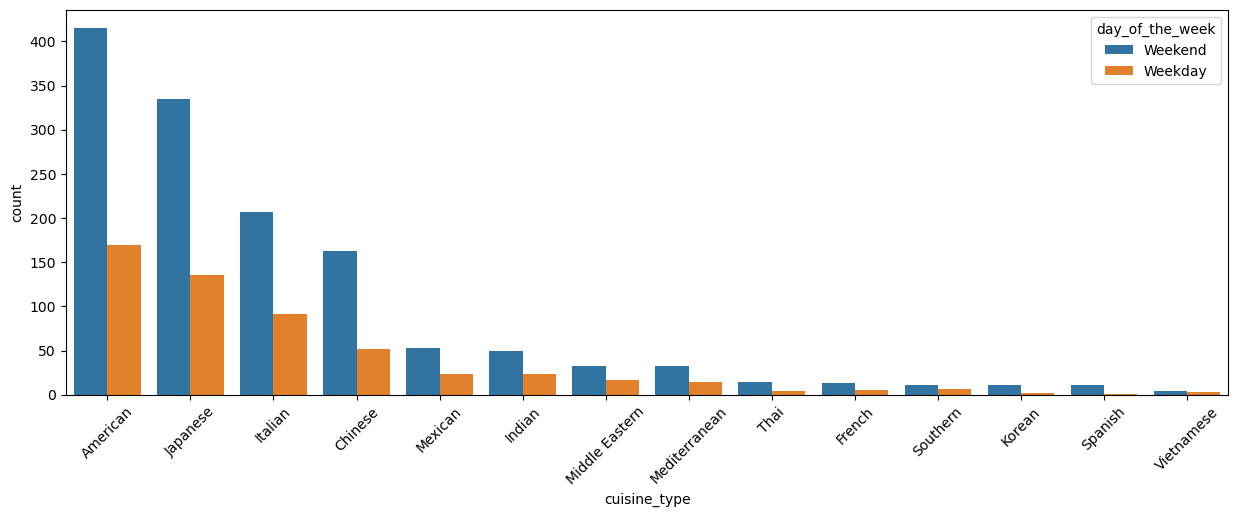

In [20]:
# Write the code here
display(foodhub_df[foodhub_df['day_of_the_week'] =='Weekend'].groupby('cuisine_type')\
.count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5))

plt.figure(figsize=(15,5))
ax = sns.countplot(data=foodhub_df, x='cuisine_type', order=foodhub_df['cuisine_type'].value_counts().index, hue='day_of_the_week')
ax.tick_params(axis='x', rotation=45)

#### Observations:

* American Cuisine Type is the most popular cuisine type during the weekends with a count of 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
# Write the code here
percentage_above20 = 100*sum(foodhub_df["cost_of_the_order"]>20)/len(foodhub_df["cost_of_the_order"])
print("%2.2f%% of the orders cost more than 20 dollars." % (percentage_above20))

29.24% of the orders cost more than 20 dollars.


#### Observations:

* Total orders that cost above 20 dollars: 555
* Percentage of orders above 20 dollars: 29.24 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
# Write the code here
mean_delivery_time = foodhub_df["delivery_time"].mean()

mean_delivery_time = round(foodhub_df['delivery_time'].mean(), 2)
std_delivery_time = round(foodhub_df['delivery_time'].std(), 2)

order_delivery_ratio = std_delivery_time / mean_delivery_time

print('Mean order delivery time:', mean_delivery_time)
print('Standard deviation:', std_delivery_time)
print('Coefficient of variation (CV):', "%2.2f%%" % (order_delivery_ratio * 100))

Mean order delivery time: 24.16
Standard deviation: 4.97
Coefficient of variation (CV): 20.57%


#### Observations:

The mean order delivery time is 24.16 minutes. However, a coefficient of variation of 20.57% suggests there is a noticeable level of inconsistency in delivery durations.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
# Write the code here
foodhub_df.groupby("customer_id")["order_id"].count().reset_index().sort_values(by="order_id", ascending=False).reset_index(drop=True).head(3)

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9


#### Observations:

Customers with customer_id 52832, 47440 and 83287 have placed 13, 10 and 9 orders respectively, which makes them the top 3 most frequent customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


/var/folders/86/xqs4hy750rd66ntklvm6qgmh0000gn/T/ipykernel_24839/3702041957.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(foodhub_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


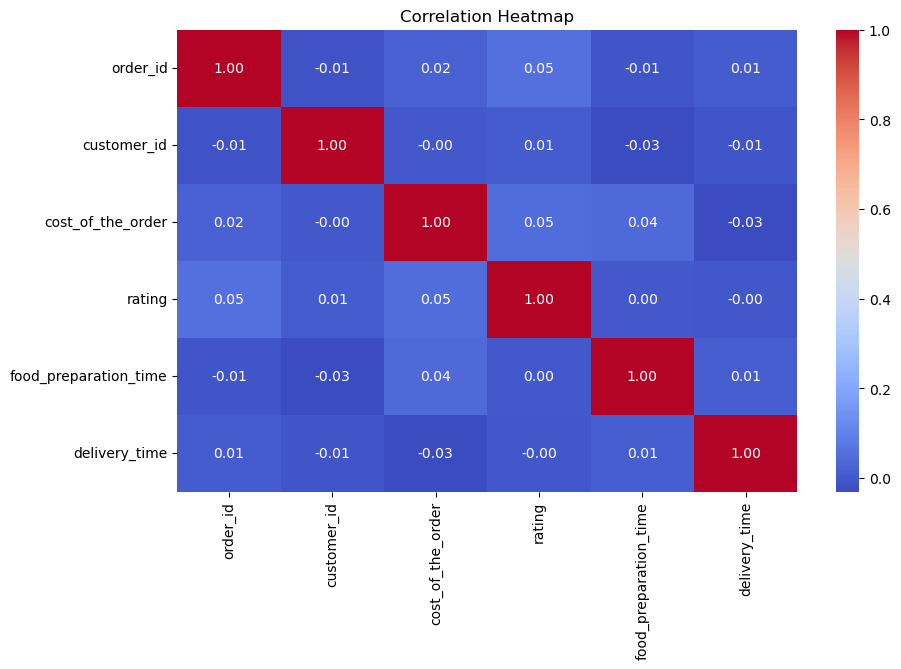

In [24]:
# Write the code here
foodhub_df.head()
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(foodhub_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


* There are no significant correlations between the numerical values. 

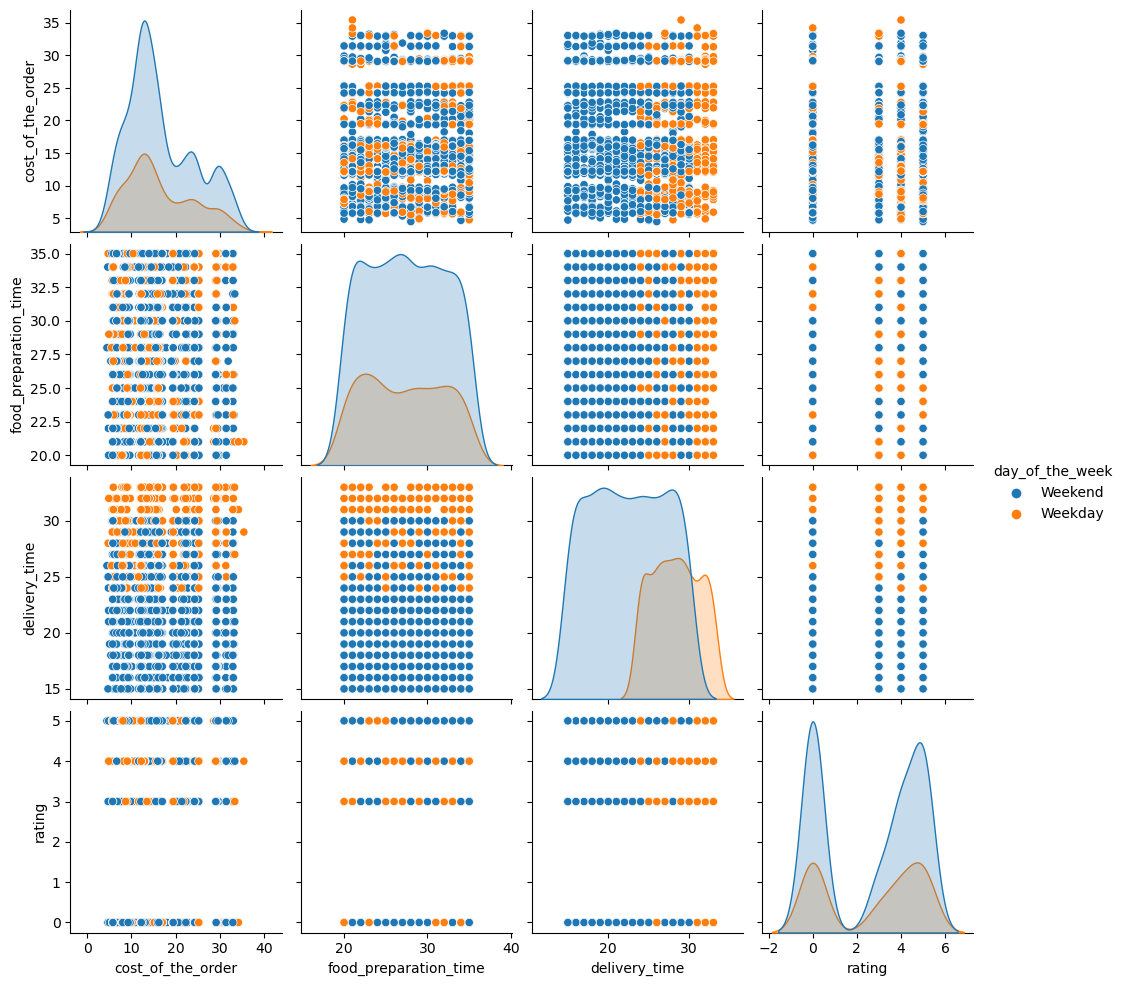

In [25]:
# Pairplot for Numerical Variables
# sns.pairplot(foodhub_df, hue="day_of_the_week")
sns.pairplot(data = foodhub_df[['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating',"day_of_the_week"]], hue="day_of_the_week")
plt.show()

### Observations from Pair Plot (Multivariate Analysis)

#### 1. Rating vs Delivery Time
- Higher ratings are mostly seen for lower delivery times.
- A dense cluster around rating = 0 due to many "Not Given" ratings may affect the overall interpretation.
- Faster delivery often correlates with better customer satisfaction.

#### 2. Cost of Order vs Food Preparation Time
- A weak positive correlation is visible.
- Higher-cost orders tend to have slightly longer preparation times, likely due to complexity or order size.

#### 3. Cost of Order vs Delivery Time
- Slight positive trend suggests that premium or higher-cost orders might take longer to deliver.
- Could be due to packaging needs, distance, or restaurant policies.

#### 4. Delivery Time vs Food Preparation Time
- Minimal correlation observed.
- Indicates delivery time variability is likely caused by external factors (traffic, location) more than kitchen delays.

#### 5. Cluster Formations
- If color-coded by features like cuisine or restaurant, visible clusters may appear.
- Implies common preferences or behaviors among specific customer groups.

#### 6. Multimodal Distributions
- Cost and rating distributions appear bimodal or skewed.
- Suggests two different market segments (e.g., students vs working professionals).

#### 7. Outliers
- Some data points show:
  - Extremely high delivery times (>60 minutes)
  - Very expensive orders (> $40)
  - Low ratings despite short delivery times
- These outliers warrant deeper analysis for service quality or unusual behaviors.


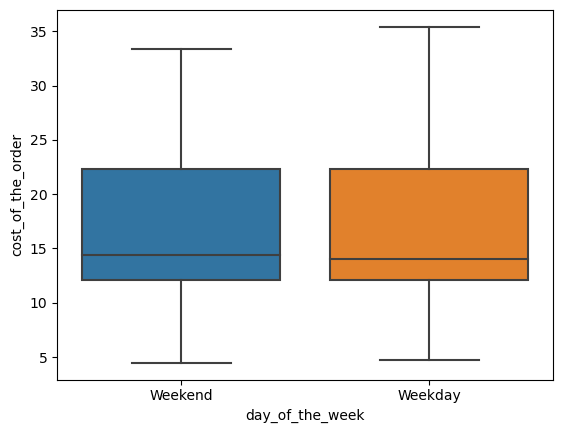

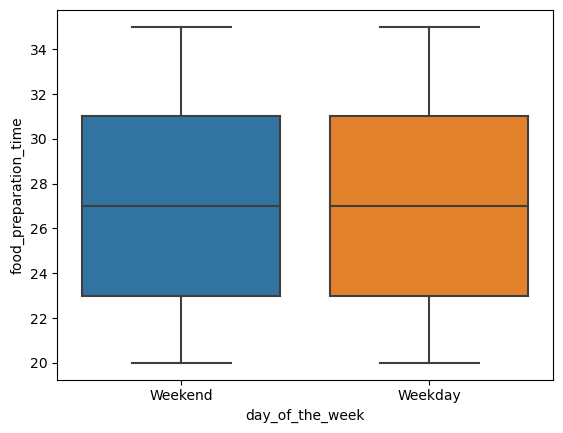

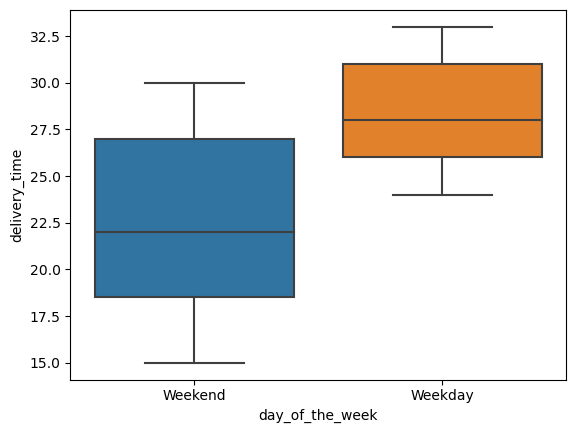

In [26]:
sns.boxplot(data=foodhub_df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
sns.boxplot(data=foodhub_df,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(data=foodhub_df,x='day_of_the_week',y='delivery_time') 
plt.show()

#### Observations on Day of the Week vs Other Variables:

The distribution of most variables appears consistent across all days. However, delivery time stands out with noticeable variation. Deliveries tend to take longer on weekdays compared to weekends. Specifically, the median delivery time during weekends is approximately 22.5 minutes, whereas on weekdays it increases to around 28.5 minutes, suggesting possible delays due to weekday traffic or operational constraints.

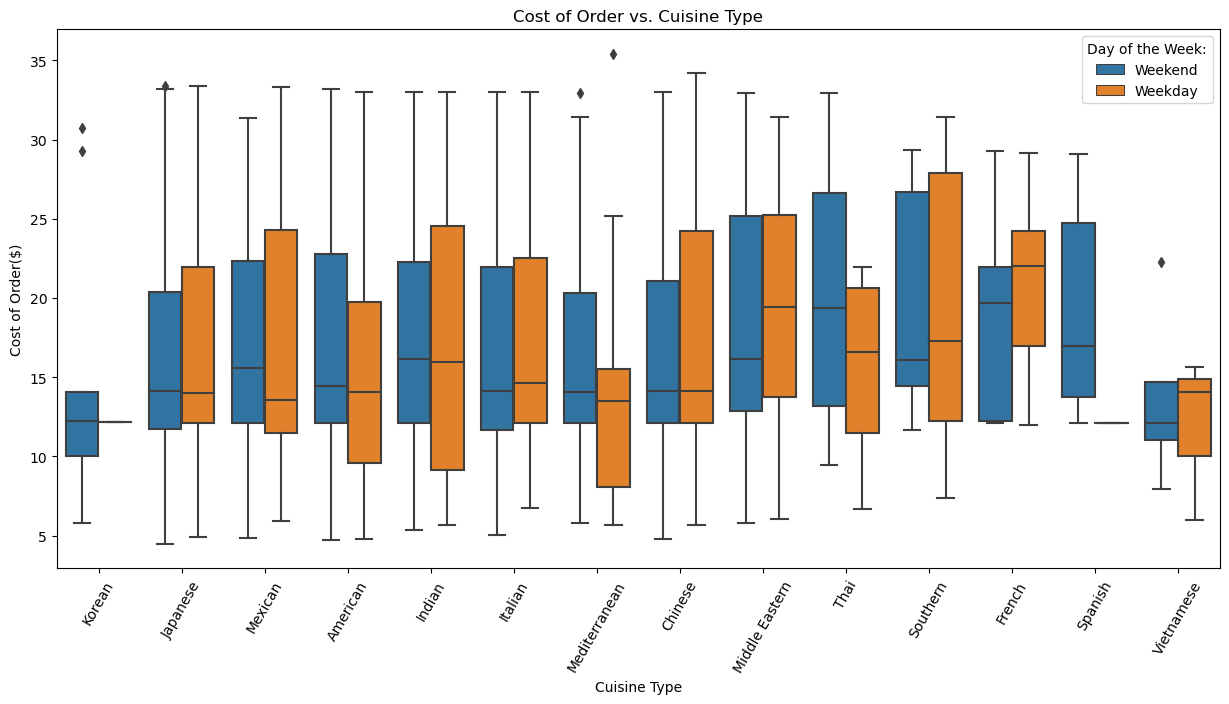

In [27]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = foodhub_df,hue='day_of_the_week')
plt.title('Cost of Order vs. Cuisine Type')
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Cost of Order($)')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show()

- **Cost Variability by Cuisine:**  
  There is noticeable variation in the median and range of order costs across different cuisine types. Notably, cuisines such as *Korean* and *Vietnamese* tend to have the **lowest average order costs** among all.

- **Outliers in Order Cost:**  
  Several cuisine types exhibit **high-cost outliers**, indicating that certain dishes or meal combinations are **significantly more expensive** than the average offerings in those categories.

- **Right-Skewed Distributions:**  
  For the majority of cuisines, the order cost distribution shows a **right skew**, suggesting that while most customers place lower-cost orders, there are **a few high-value orders** that raise the upper end of the cost spectrum.


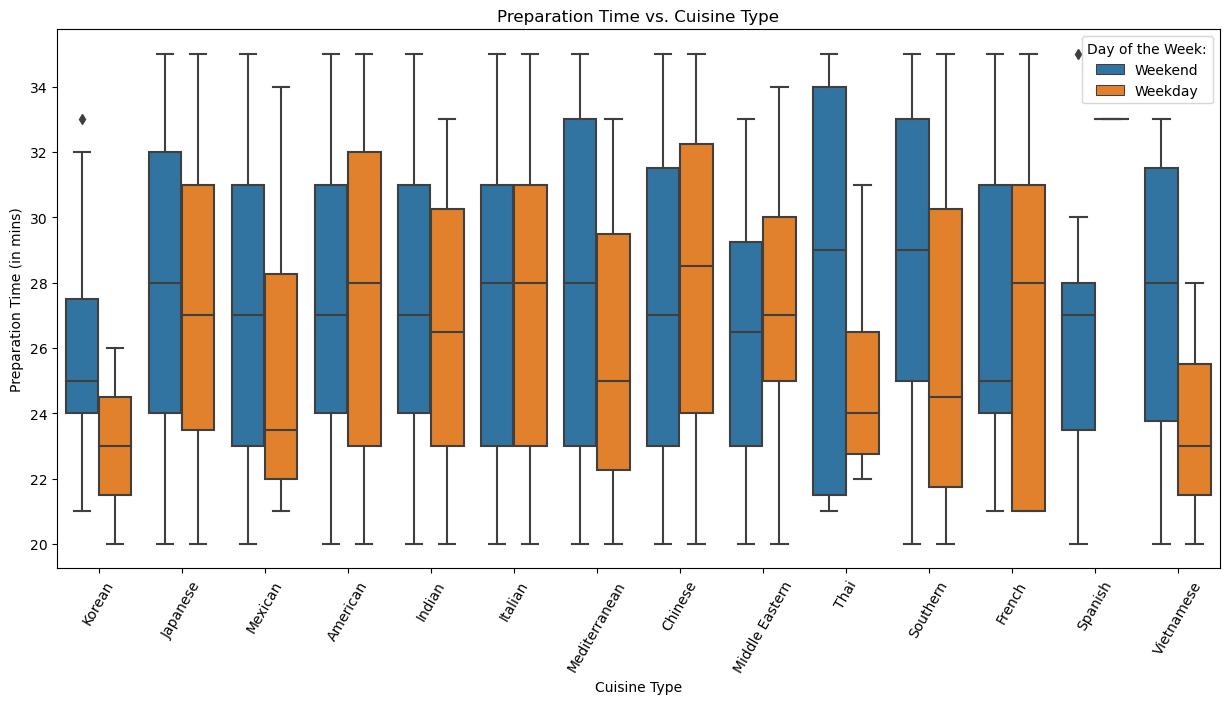

In [28]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = foodhub_df,hue='day_of_the_week')
plt.title('Preparation Time vs. Cuisine Type')
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Preparation Time (in mins)')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 60)
plt.show()

### Observations and Insights

- **Preparation Time Variability:**  
  Different cuisines display varying preparation time ranges. For example, *French* and *Thai* cuisines have a wider spread and notable differences between weekdays and weekends. In contrast, *Italian* cuisine maintains relatively consistent preparation times regardless of the day.

- **Median Times and Outliers:**  
  Cuisines like *Spanish* and *Korean* reflect shorter median preparation durations but also present a few high-value outliers. This suggests that some meals within these categories may be more intricate, potentially requiring additional preparation time due to recipe complexity, resource constraints, or kitchen inefficiencies.

- **Implications for Business:**
  - **Menu Simplification:**  
    Restaurants offering cuisines with wide variability in prep times could evaluate and optimize their menu, possibly adjusting or replacing items that consistently delay order processing.

  - **Managing Customer Expectations:**  
    When serving cuisines known for longer prep durations, it's beneficial to proactively communicate estimated wait times to customers. This improves transparency and can boost overall satisfaction.

  - **Operational Enhancements:**  
    Recognizing trends in prep times allows for smarter decisions in staffing, inventory planning, and kitchen workflow improvements.

  - **Handling Weekend Demand:**  
    For cuisines that experience longer prep times over weekends, restaurants may want to introduce special menus or temporarily increase staff to accommodate the higher volume of orders efficiently.


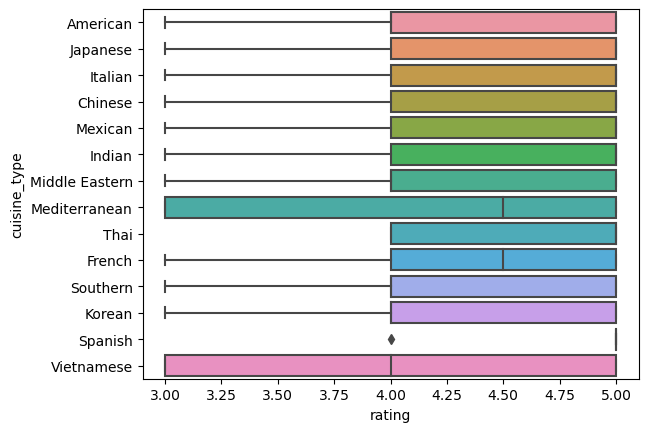

In [29]:
sns.boxplot(data=foodhub_df[foodhub_df['rating']!=0],x='rating',y='cuisine_type', order=foodhub_df['cuisine_type'].value_counts().index)
plt.show()

### Observations

- **Cost vs. Rating Trend:**  
  Cuisine types like *Mediterranean* and *Vietnamese*, which tend to have the lowest average order costs, are also the only ones with average ratings falling below 4. This pattern may hint at a possible link between price and perceived value — where lower-priced offerings might be viewed as lower quality or less satisfying, potentially attracting more critical feedback.

- **Need for Further Analysis:**  
  While the trend is notable, it is not sufficient to draw definitive conclusions. Further investigation is needed to understand whether factors like portion size, delivery experience, or customer expectations contribute to the lower ratings.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [30]:
# Write the code here
# Exclude entries with no ratings from both frames
foodhub_df_with_ratings = foodhub_df[foodhub_df['rating']!= 0]

# Create a dataframe matching condition one
foodhub_df_cond_1 = foodhub_df_with_ratings[['restaurant_name','rating']]\
.groupby('restaurant_name')\
.count() > 50

foodhub_df_cond_1['count'] = foodhub_df_with_ratings.groupby('restaurant_name')['rating'].count()

# Create a dataframe matching condition two
foodhub_df_cond_2 = foodhub_df_with_ratings[['restaurant_name','rating']]\
.groupby('restaurant_name')\
.mean() > 4

foodhub_df_cond_2['mean'] = foodhub_df_with_ratings.groupby('restaurant_name')['rating'].mean()

# Intersect (merge) the resulting data frames on the restaurant name
foodhub_df_merged = pd\
.merge(foodhub_df_cond_1[foodhub_df_cond_1['rating']], foodhub_df_cond_2[foodhub_df_cond_1['rating']],on ='restaurant_name')\
.rename(columns = {'rating_x':'rating_count_more_than_50', 'rating_y': 'average_greater_than_4'})

# Present
display(foodhub_df_merged[['count', 'mean', 'rating_count_more_than_50', 'average_greater_than_4']].sort_values(by='count', ascending=False))

,count,mean,rating_count_more_than_50,average_greater_than_4
restaurant_name,,,,
Shake Shack,133,4.278195,True,True
The Meatball Shop,84,4.511905,True,True
Blue Ribbon Sushi,73,4.219178,True,True
Blue Ribbon Fried Chicken,64,4.328125,True,True


#### Observations:

* Four restaurants — Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop — meet the criteria for the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [31]:
# Write the code here
order_sum_over_20 = foodhub_df[foodhub_df['cost_of_the_order'] > 20]['cost_of_the_order'].sum()
order_sum_over_5 = foodhub_df[(foodhub_df['cost_of_the_order'] > 5) & (foodhub_df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum()

print(order_sum_over_20 * 0.25 + order_sum_over_5 * 0.15)

6166.303


#### Observations:

The net revenue generated is \$ 6166.303 as per the provided company charges.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [32]:
# Write the code here
foodhub_df['total_time']=foodhub_df['food_preparation_time']+foodhub_df['delivery_time']
above_60_tt=foodhub_df['total_time'][foodhub_df['total_time']>60].count()
print("{0} percent of orders take more than 60 minutes to deliver".format(round(100*above_60_tt/foodhub_df['total_time'].count(),2)))

10.54 percent of orders take more than 60 minutes to deliver


#### Observations:
* About 10.54% of all orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

,mean,sum,count,std
day_of_the_week,,,,
Weekday,28.340037,15502,547,2.891428
Weekend,22.470022,30357,1351,4.628938


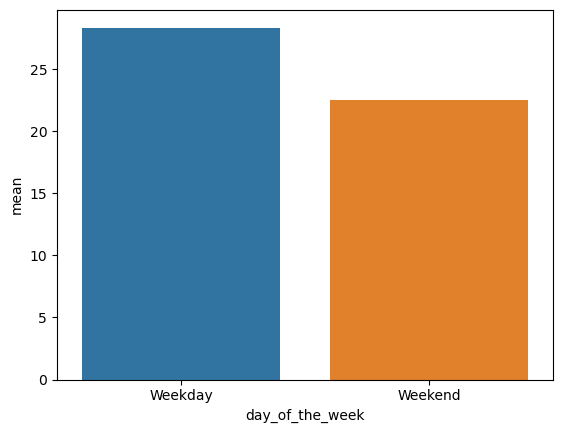

In [33]:
# Write the code here
mean_delivery_time = foodhub_df.groupby('day_of_the_week')['delivery_time'].agg(['mean','sum','count','std'])
display(mean_delivery_time)

sns.barplot(data=mean_delivery_time,y='mean',x=mean_delivery_time.index)
plt.show()

#### Observations:

The average delivery time on weekends is 22.47 minutes, while on weekdays it increases to 28.34 minutes. This finding is particularly interesting when considering the order volume, which is lower on weekdays than on weekends. A likely reason for this could be increased traffic congestion during weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
#### Ratings Behavior:
* A majority of ratings are concentrated at the top score (5), indicating that only highly satisfied customers tend to leave feedback. However, with approximately 38–39% of orders unrated, the absence of feedback could be due to either disinterest or dissatisfaction, which introduces potential bias and uncertainty in sentiment analysis.


#### Order Cost Distribution: 
* The cost of orders shows a bimodal trend, with major peaks around \$ 13 and a secondary peak near \$ 25. This may reflect two distinct customer groups—possibly students and working professionals—with different spending patterns.

#### Cuisine Preference: 
* American cuisine dominates both on weekdays and weekends, followed by Japanese, Italian, and Chinese options. The consistency of this preference across days suggests a strong brand or cultural affinity among customers.

#### Weekend vs. Weekday Trends: 
* Although order volume is higher on weekends, delivery times are faster (22.47 mins vs. 28.34 mins). This could be due to lower traffic and operational efficiency during weekends despite higher demand.

#### Time Analysis: 
* Food preparation time remains relatively stable (avg. ~27.4 mins), while delivery time shows greater variability, making it the main contributor to total service time. Roughly 10.54% of all orders take more than 60 minutes from placement to delivery.

#### Customer Behavior Insights: 
* Choices appear to be influenced by sentiment and perceived value, with familiarity, global visibility of cuisine, and price-quality perceptions playing a role in customer decisions.

#### Top Restaurants: 
* Shake Shack, The Meatball Shop, and Blue Ribbon Sushi rank highest in total order volume. Interestingly, four restaurants are tied in fifth position for promotional eligibility, requiring further business decisions for reward allocation.

#### Revenue & Order Value: 
* With an average order cost of 16.50 dollars, and around 29.24\% of orders exceeding 20 dollars, the platform has achieved an estimated commission-based revenue of \$ 6,166.30 from the analyzed dataset.

#### Ratings & Reputation: 
* The Meatball Shop holds the highest average customer rating, trailed closely by Blue Ribbon Fried Chicken and Shake Shack—indicating strong customer satisfaction and brand reputation for these outlets.

#### Feedback Gaps: 
* The high volume of missing ratings highlights a need for improved post-delivery engagement or follow-ups to gather more comprehensive customer feedback.

### Recommendations:

#### 1. Enhance Customer Feedback Collection
* A large portion of orders (around 38–39%) remain unrated, limiting the understanding of customer satisfaction.

* Introduce incentives such as discount codes, loyalty points, or small rewards for customers who leave feedback.

* Send polite follow-up notifications or short surveys post-delivery to encourage ratings and understand reasons for non-response.

#### 2. Targeted Marketing Based on Order Cost Segmentation
* The bimodal cost distribution suggests two distinct customer segments—likely budget-conscious students and higher-spending professionals.

* Use demographic data (age, occupation, location) to create tailored marketing campaigns for each segment.

* Consider dynamic pricing, bundle deals, or student-focused offers during weekdays to drive sales.

#### 3. Cuisine Strategy & Menu Optimization
* American, Japanese, Italian, and Chinese cuisines are the most popular and consistent across days.

    * Partner with more restaurants offering these cuisines.

    * Use special promotions or featured listings for underperforming cuisine types to boost their visibility.

* Encourage underperforming restaurants to diversify their menu by incorporating elements from top cuisines (e.g., fusion items).

#### 4. Optimize Delivery Operations
* The average delivery time is 24.16 minutes, with some orders exceeding 60 minutes.

* Focus on:

    * Route optimization using geospatial data.

    * Increasing delivery fleet capacity during peak hours.

    * Establishing micro-fulfillment centers in high-demand zones to reduce distance.

#### 5. Weekday Demand Boost Strategies
* Despite faster delivery on weekends, fewer orders are placed on weekdays.

* Implement weekday-only offers, such as:

    -  “Midweek Meal Deals”

    -  Discounts for lunchtime orders

    - Happy hour incentives for evening orders

* Investigate if weekday delivery delays discourage customers from ordering—adjust delivery staffing accordingly.

#### 6. Refine Promotional Offer Criteria
* In cases where multiple restaurants meet promotional thresholds equally (e.g., rating & count), introduce:

    * Tie-breaker rules based on additional metrics such as revenue contribution, average cost per order, or customer repeat rate.

    * Alternatively, reward all qualifying candidates if financially viable.

#### 7. Explore Sentiment & Perception Insights
* Conduct deeper research into customer sentiment and cultural preferences:

    * How perception of cuisine types affects choice.

    * Whether consistency in delivery influences trust and satisfaction.

    * Relationship between perceived value and actual cost.

* Use these insights to adjust restaurant positioning, pricing, and promotional messaging.

#### 8. Loyalty & Retention Programs
* Encourage repeat orders through:

    * Tiered loyalty systems based on monthly order volume.

    * Discounts or perks on the second/third order.

    * Referral bonuses to expand customer base organically.

#### 9. Monitor External Influences
* Analyze external variables like time of day, weather, or traffic conditions that may affect delivery performance.

* Use predictive models to anticipate peak times and plan resources in advance.